## PRCP- 1001- RiceLeaf disease detection

### Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of
rice plants like leaf blast, bacterial blight and brown spot.

Task 3:- Analyze various techniques like Data Augmentation, etc and create a
report on that.

### Dataset Description

This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3
classes based on the type of disease. There are 40 images in each class.

Classes

● Leaf smut

● Brown spot

● Bacterial leaf blight

### Business Case : To classify Rice Leaf Disease using CNN

In [4]:
# Importing necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style ("dark")

import pandas as pd
import numpy as np
import itertools
import cv2
import PIL
import skimage.transform as st

import tensorflow as tf
tf.get_logger().setLevel('ERROR')
from tensorflow import keras

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import load_img,img_to_array

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
from keras.layers import Flatten,Dense
from keras.models import Model

from kerastuner import RandomSearch

import tensorflow_hub as hub
from keras.applications.vgg16 import VGG16

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

##### Loading the dataset

In [ ]:
import pathlib
from google.colab import drive
drive.mount('/content/drive')
data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data')

#data_dir = pathlib.Path('C:/Users/User/Desktop/PTID-CDS-SEP-22-1370A_Internship/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data')

In [ ]:
# finding total number of images in the directory
image_count = len(list(data_dir.glob('*/*')))
print('we have {} files in the directory'.format(image_count))

we have 119 files in the directory


In [6]:
# Creating the dictionary with respect to rice leaf disease using directory path
rice_leaf_images_dict = {
    'leaf_smut': list(data_dir.glob('*smut/*')),
    'brown_spot': list(data_dir.glob('Brown*/*')),
    'bacterial_leaf_blight': list(data_dir.glob('Bacterial*/*')),
}

In [7]:
rice_leaf_images_dict['leaf_smut'][:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Leaf smut/DSC_0308.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Leaf smut/DSC_0309.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Leaf smut/DSC_0316.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Leaf smut/DSC_0327.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Leaf smut/DSC_0338.JPG')]

In [8]:
rice_leaf_images_dict['brown_spot'][:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Brown spot/DSC_0300.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Brown spot/DSC_0301.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Brown spot/DSC_0299.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Brown spot/DSC_0302.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Brown spot/DSC_0332.JPG')]

In [9]:
rice_leaf_images_dict['bacterial_leaf_blight'][:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight/DSC_0377.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight/DSC_0378.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight/DSC_0379.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight/DSC_0365.JPG'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight/DSC_0373.JPG')]

### Exploratory Data Analysis

##### Identifying Class Imbalance

[Text(0, 0, '39'), Text(0, 0, '40'), Text(0, 0, '40')]

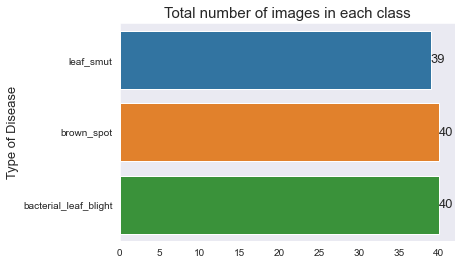

In [ ]:
# Plotting total number of images present in each class
x_axis = [len(rice_leaf_images_dict['leaf_smut']),len(rice_leaf_images_dict['brown_spot']),len(rice_leaf_images_dict['bacterial_leaf_blight'])]
rice_leaf_category = ['leaf_smut','brown_spot','bacterial_leaf_blight']
plt.rcParams["figure.figsize"] =(6,4)
plot = sns.barplot(x_axis,rice_leaf_category)
plot.set_xlabel("", fontsize = 13)
plot.set_ylabel("Type of Disease", fontsize = 13)
plot.set_title("Total number of images in each class", fontsize = 15)
plot.bar_label(plot.containers[0], fontsize =13)

We have 40 images with brown spot and bacterial leaf blight and 39 images with leaf smut

##### Plotting Image Size

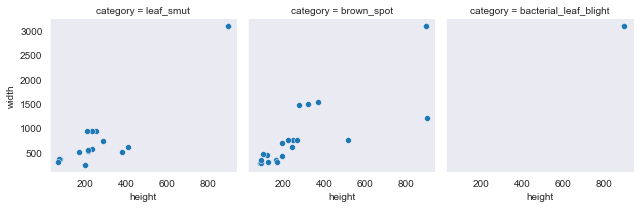

In [ ]:
# Plotting image size by creating a new dataframe
class_ = []
height = []
width = []
for category in rice_leaf_images_dict.keys():
    for i in range(0,len(rice_leaf_images_dict[category])):
        im = PIL.Image.open(str(rice_leaf_images_dict[category][i]))
        arr = np.array(im)
        h,w,d = arr.shape
        class_.append(category)
        height.append(h)
        width.append(w)
df = pd.DataFrame(zip(class_,height,width),columns=['category','height','width'])
g = sns.FacetGrid(df, col="category")
g.map(sns.scatterplot, "height", "width")

We have images with different dimensions in the dataset for leaf_smut and brown spot rice leaf images. All the bacterial leaf blight rice leaf images are of same size. Image size will be resized before reading images from disk into numpy array.

##### Viewing a Sampling of Images

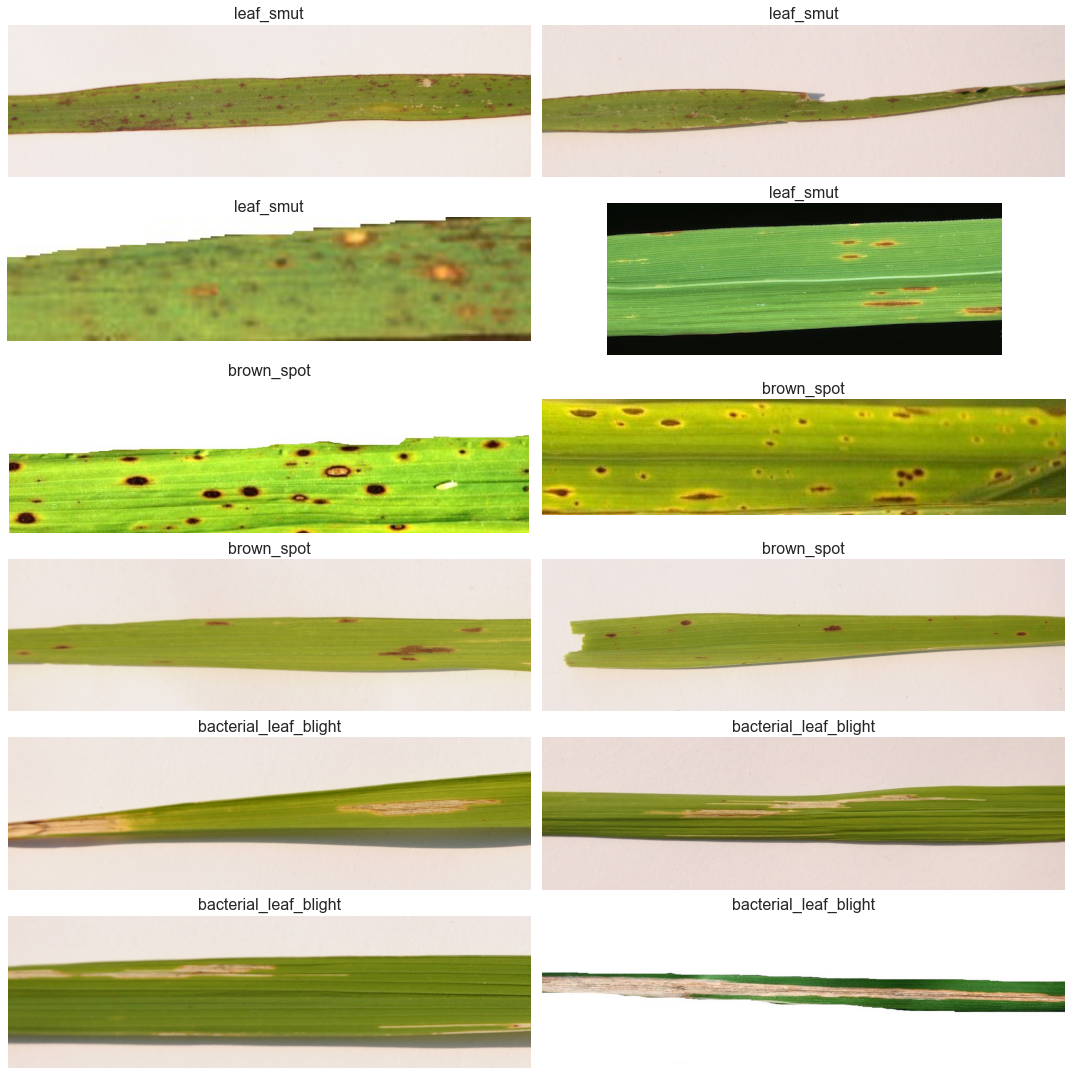

In [ ]:
plt.figure(figsize=(15,15))
plotnumber = 1
for i in rice_leaf_category:
    for j in [5,15,25,37]:
        ax = plt.subplot(6,2,plotnumber)
        im1 = PIL.Image.open(str(rice_leaf_images_dict[i][j]))
        plt.imshow(im1)
        plotnumber += 1
        plt.title(i,fontsize = 16)
        plt.axis('off')
plt.tight_layout()
plt.show()    

* Leaf smut : Small black spots spread across the leaves.
* Brown spot : spots are circular, brownish, and have a gray center surrounded by a reddish margin.
* Bacterial leaf blight : spots are yellowish, also looks like a dry leaf partially.

### Pre-Processing

##### Read rice leaf images from disk into numpy array using opencv

In [10]:
# Creating labels dictionary for creating y variable 
rice_leaf_labels_dict = {
    'leaf_smut': 0,
    'brown_spot': 1,
    'bacterial_leaf_blight': 2,
}

In [11]:
X, y = [], []
i=0
for rice_leaf_disease,images in rice_leaf_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(250,250))
        X.append(resized_img)
        y.append(rice_leaf_labels_dict[rice_leaf_disease])

In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
X[0]

array([[[221, 227, 238],
        [221, 227, 238],
        [223, 227, 238],
        ...,
        [214, 224, 241],
        [216, 223, 242],
        [216, 224, 241]],

       [[222, 228, 239],
        [220, 226, 237],
        [221, 227, 238],
        ...,
        [217, 225, 242],
        [217, 225, 242],
        [215, 223, 240]],

       [[222, 228, 239],
        [218, 227, 237],
        [221, 227, 238],
        ...,
        [215, 223, 240],
        [217, 226, 240],
        [218, 225, 242]],

       ...,

       [[226, 232, 240],
        [225, 232, 241],
        [223, 230, 239],
        ...,
        [218, 226, 239],
        [219, 227, 239],
        [218, 227, 241]],

       [[226, 231, 240],
        [224, 231, 240],
        [223, 230, 239],
        ...,
        [216, 225, 238],
        [218, 226, 239],
        [217, 226, 240]],

       [[226, 231, 240],
        [223, 230, 239],
        [224, 231, 239],
        ...,
        [216, 224, 241],
        [217, 226, 240],
        [217, 226, 240]]

In [14]:
y[0]

0

##### Traning and testing data creation

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=105,stratify=y)

In [16]:
X_train.shape

(95, 250, 250, 3)

In [17]:
y_train.shape

(95,)

In [18]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({2: 32, 0: 31, 1: 32}), Counter({2: 8, 0: 8, 1: 8}))

In [19]:
X_test.shape

(24, 250, 250, 3)

In [20]:
y_test.shape

(24,)

In [21]:
y_train

array([2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2,
       2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2,
       2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1,
       2, 0, 1, 1, 2, 2, 1])

##### Scale the images

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
X_train_scaled[0]

array([[[0.88627451, 0.90980392, 0.9372549 ],
        [0.88627451, 0.90588235, 0.94117647],
        [0.89803922, 0.90196078, 0.94117647],
        ...,
        [0.90980392, 0.9254902 , 0.94509804],
        [0.90588235, 0.92156863, 0.94117647],
        [0.89411765, 0.91764706, 0.9372549 ]],

       [[0.89411765, 0.90588235, 0.9372549 ],
        [0.89411765, 0.90588235, 0.9372549 ],
        [0.89019608, 0.89803922, 0.9372549 ],
        ...,
        [0.90588235, 0.92156863, 0.94117647],
        [0.90196078, 0.91764706, 0.9372549 ],
        [0.90196078, 0.91764706, 0.9372549 ]],

       [[0.89411765, 0.90196078, 0.94117647],
        [0.89803922, 0.90980392, 0.94117647],
        [0.89411765, 0.90588235, 0.9372549 ],
        ...,
        [0.90196078, 0.91372549, 0.94509804],
        [0.90196078, 0.91764706, 0.9372549 ],
        [0.90196078, 0.91764706, 0.9372549 ]],

       ...,

       [[0.8745098 , 0.89411765, 0.92941176],
        [0.8745098 , 0.89803922, 0.93333333],
        [0.87843137, 0

In [24]:
X_test_scaled[0]

array([[[0.85098039, 0.87058824, 0.92941176],
        [0.84313725, 0.87058824, 0.9372549 ],
        [0.84313725, 0.8627451 , 0.92156863],
        ...,
        [0.84705882, 0.8627451 , 0.93333333],
        [0.85098039, 0.87058824, 0.92941176],
        [0.84313725, 0.87058824, 0.92941176]],

       [[0.85098039, 0.87058824, 0.92941176],
        [0.83921569, 0.86666667, 0.93333333],
        [0.85098039, 0.87058824, 0.92941176],
        ...,
        [0.85098039, 0.86666667, 0.9372549 ],
        [0.85098039, 0.8745098 , 0.9254902 ],
        [0.83921569, 0.86666667, 0.9254902 ]],

       [[0.84313725, 0.87058824, 0.92941176],
        [0.83921569, 0.86666667, 0.93333333],
        [0.85098039, 0.86666667, 0.92941176],
        ...,
        [0.84705882, 0.86666667, 0.9254902 ],
        [0.85490196, 0.87843137, 0.92941176],
        [0.84705882, 0.86666667, 0.9254902 ]],

       ...,

       [[0.85098039, 0.86666667, 0.9372549 ],
        [0.84313725, 0.86666667, 0.92941176],
        [0.85098039, 0

### Model Creation

##### Implementing Convolutional Neural Network

In [ ]:
# Initialising the CNN
cnn = models.Sequential()
# Adding 1st convolution layer
cnn.add(layers.Conv2D(filters=62,padding='same', kernel_size=(3, 3),strides=3, activation='relu', input_shape=(250, 250, 3)))
# Adding 1st Maxpooling layer
cnn.add(layers.MaxPooling2D(pool_size=(2,2), strides=1))
# Adding 2nd convolution layer    
cnn.add(layers.Conv2D(filters=124,padding='same', kernel_size=(3, 3),strides=1, activation='relu'))
# Adding 2nd Maxpooling layer
cnn.add(layers.MaxPooling2D(pool_size=(2,2), strides=1))
# Flattening    
cnn.add(layers.Flatten())
# Input Layer
cnn.add(layers.Dense(124, activation='relu'))

#Output Layer
cnn.add(layers.Dense(3, activation='softmax'))

# Compile the model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train_scaled, y_train,validation_split=0.2, epochs=25,batch_size=20)

Epoch 1/25
4/4 [==============================] - 9s 261ms/step - loss: 39.2500 - accuracy: 0.3553 - val_loss: 9.7802 - val_accuracy: 0.2632
Epoch 2/25
4/4 [==============================] - 0s 68ms/step - loss: 3.3919 - accuracy: 0.3816 - val_loss: 1.1506 - val_accuracy: 0.2632
Epoch 3/25
4/4 [==============================] - 0s 68ms/step - loss: 1.1432 - accuracy: 0.3158 - val_loss: 1.2204 - val_accuracy: 0.2632
Epoch 4/25
4/4 [==============================] - 0s 66ms/step - loss: 0.9524 - accuracy: 0.5000 - val_loss: 1.4141 - val_accuracy: 0.3684
Epoch 5/25
4/4 [==============================] - 0s 66ms/step - loss: 1.1404 - accuracy: 0.5263 - val_loss: 1.7388 - val_accuracy: 0.2632
Epoch 6/25
4/4 [==============================] - 0s 68ms/step - loss: 0.8461 - accuracy: 0.5921 - val_loss: 1.1096 - val_accuracy: 0.6316
Epoch 7/25
4/4 [==============================] - 0s 68ms/step - loss: 0.6557 - accuracy: 0.6842 - val_loss: 0.8238 - val_accuracy: 0.6316
Epoch 8/25
4/4 [=========

In [ ]:
# Model evaluation
cnn.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 193ms/step - loss: 1.7636 - accuracy: 0.6250


[1.7635713815689087, 0.625]

In [ ]:
y_pred = cnn.predict(X_test_scaled)
y_pred[:5]

1/1 [==============================] - 0s 90ms/step


array([[6.8108514e-02, 9.0737998e-01, 2.4511565e-02],
       [9.6553224e-01, 1.0756877e-03, 3.3391964e-02],
       [9.9701166e-01, 2.9674016e-03, 2.0908405e-05],
       [4.3666381e-01, 6.7368089e-03, 5.5659944e-01],
       [9.9424666e-01, 5.7435664e-03, 9.8357968e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:24]

[1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2]

In [ ]:
# Classification report
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.40      0.25      0.31         8
           2       0.78      0.88      0.82         8

    accuracy                           0.62        24
   macro avg       0.59      0.62      0.60        24
weighted avg       0.59      0.62      0.60        24



In [ ]:
# view the structure of the model
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 84, 84, 62)        1736      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 83, 83, 62)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 83, 83, 124)       69316     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 82, 82, 124)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 833776)            0         
                                                                 
 dense (Dense)               (None, 124)               1

Model is overfitting, so data augmentation is required to create a generalized model.

##### Data Augmentation by adding layers using Keras.Sequential and adding  a drop out layer

In [25]:
# Creating Data Augmentation object to be used in the model creation
data_augmentation = keras.Sequential(
    [
    layers.experimental.preprocessing.RandomRotation(0.1,input_shape=(250, 250, 3)),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomContrast(0.1)])

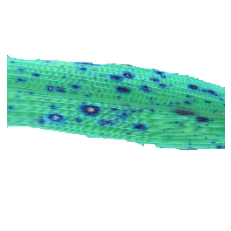

In [ ]:
# Plotting image in the X_train 
plt.axis('off')
plt.imshow(X_train[38])

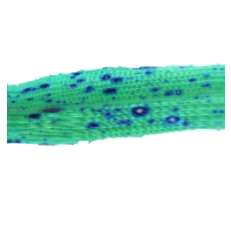

In [ ]:
# Plotting the augmented image
plt.axis('off')
plt.imshow(data_augmentation(X_train)[38].numpy().astype("uint8"))

In [ ]:
#Train the model using data augmentation and a drop out layer
# Initialising the CNN
cnn_da = models.Sequential()

# Adding data augmentation
cnn_da.add(data_augmentation)

# Adding 1st convolution layer
cnn_da.add(layers.Conv2D(filters=62,padding='same', kernel_size=(3, 3),strides=3, activation='relu', input_shape=(250, 250, 3)))

# Adding 1st Maxpooling layer
cnn_da.add(layers.MaxPooling2D(pool_size=(2,2), strides=1))

# Adding 2nd convolution layer    
cnn_da.add(layers.Conv2D(filters=124,padding='same', kernel_size=(3, 3),strides=1, activation='relu'))

# Adding 2nd Maxpooling layer
cnn_da.add(layers.MaxPooling2D(pool_size=(2,2), strides=1))

#Dropout layer
cnn_da.add(layers.Dropout(rate=0.3))

# Flattening    
cnn_da.add(layers.Flatten())

# Input Layer
cnn_da.add(layers.Dense(124, activation='relu'))

#Output Layer
cnn_da.add(layers.Dense(3, activation='softmax'))

# Compile the model
cnn_da.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_cnn_da= cnn_da.fit(X_train_scaled, y_train, validation_split=0.2, epochs=25,batch_size=20)

Epoch 1/25
4/4 [==============================] - 3s 201ms/step - loss: 25.7896 - accuracy: 0.3289 - val_loss: 10.1726 - val_accuracy: 0.4737
Epoch 2/25
4/4 [==============================] - 1s 128ms/step - loss: 5.9683 - accuracy: 0.3026 - val_loss: 1.1233 - val_accuracy: 0.2632
Epoch 3/25
4/4 [==============================] - 1s 129ms/step - loss: 1.1306 - accuracy: 0.3158 - val_loss: 1.1090 - val_accuracy: 0.3158
Epoch 4/25
4/4 [==============================] - 0s 125ms/step - loss: 1.0977 - accuracy: 0.4342 - val_loss: 1.0891 - val_accuracy: 0.3684
Epoch 5/25
4/4 [==============================] - 1s 128ms/step - loss: 1.0321 - accuracy: 0.5263 - val_loss: 1.3230 - val_accuracy: 0.2632
Epoch 6/25
4/4 [==============================] - 1s 129ms/step - loss: 1.0220 - accuracy: 0.5000 - val_loss: 0.9016 - val_accuracy: 0.5263
Epoch 7/25
4/4 [==============================] - 1s 126ms/step - loss: 0.8947 - accuracy: 0.5789 - val_loss: 1.0436 - val_accuracy: 0.6316
Epoch 8/25
4/4 [==

In [ ]:
#Creating function to plot loss and accuracy with respect to epochs
def plot_loss_and_acccuracy(model):
# plot the loss
  plt.plot(model.history['loss'], label='train loss')
  plt.plot(model.history['val_loss'], label='val loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()
# plot the accuracy
  plt.plot(model.history['accuracy'], label='train acc')
  plt.plot(model.history['val_accuracy'], label='val acc')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

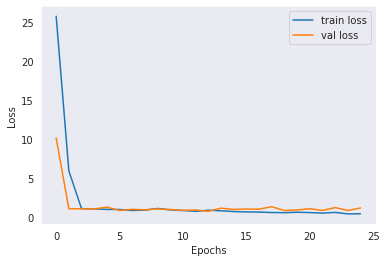

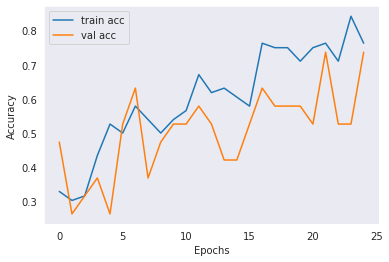

In [ ]:
#Plotting loss and accuracy with respect to epochs
plot_loss_and_acccuracy(history_cnn_da)

In [ ]:
# Model evaluation
cnn_da.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 38ms/step - loss: 1.0247 - accuracy: 0.6250


[1.0246596336364746, 0.625]

In [ ]:
y_pred_da = cnn_da.predict(X_test_scaled)
y_pred_da[:5]

1/1 [==============================] - 0s 68ms/step


array([[0.13805707, 0.4384805 , 0.42346242],
       [0.42654777, 0.1967777 , 0.37667444],
       [0.48158586, 0.51680833, 0.0016058 ],
       [0.8213763 , 0.0905798 , 0.08804378],
       [0.8332723 , 0.10331368, 0.06341402]], dtype=float32)

In [ ]:
y_classes_da = [np.argmax(element) for element in y_pred_da]
y_classes_da[:24]

[1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 1]

In [ ]:
# Classification report
print(classification_report(y_test,y_classes_da))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.40      0.25      0.31         8
           2       0.75      0.75      0.75         8

    accuracy                           0.62        24
   macro avg       0.60      0.62      0.60        24
weighted avg       0.60      0.62      0.60        24



In [ ]:
# view the structure of the model
cnn_da.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 250, 250, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 62)        1736      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 83, 83, 62)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 83, 83, 124)       69316     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 82, 82, 124)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 82, 82, 124)      

Model performance is better when compared to previous model

##### Hypertuning using KerasTuner with data augmentation (add layers using Keras.Sequential)

In [ ]:
# Creating function to tune the parameters with the provided range
def build_model(hp):  
  model = models.Sequential([
    data_augmentation, # using the data augmentation by adding layers using Keras.Sequential
    layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    layers.MaxPooling2D(
        pool_size=hp.Choice('max_pool_size_1', values = [2,3,4,5])
    ),
        layers.Dropout(
        rate= hp.Choice('dropout_1', values = [0.1,0.2,0.3,0.4,0.5])
    ),
    layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    layers.MaxPooling2D(
        pool_size=hp.Choice('max_pool_size_2', values = [2,3,4,5])
    ),
    layers.Dropout(
        rate= hp.Choice('dropout_2', values = [0.1,0.2,0.3,0.4,0.5])
    ),
    layers.Flatten(),
    layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    layers.Dense(3, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.01, 0.001])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
# Hypertuning the model using the build_model function
tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=50,directory='output',project_name="RiceLeaf disease detection")
tuner_search.search(X_train_scaled, y_train,epochs=3,validation_split=0.2)

Trial 50 Complete [00h 00m 05s]
val_accuracy: 0.4736842215061188

Best val_accuracy So Far: 0.5789473652839661
Total elapsed time: 00h 05m 05s


In [ ]:
# Selecting the top performed model 
hypertuned_model=tuner_search.get_best_models(num_models=1)[0]
# view the structure of the model
hypertuned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 246, 246, 48)      3648      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 48)        20784     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 48)       0         
 2D)                                                    

In [ ]:
#File name includes epoch
filepath='/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Hypertuned_models/hypertuned_model_{epoch:02d}.hdf5'
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#This callback will stop the training when there is no improvement in the validation loss for three consecutive epochs.
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Hypertuned_models/my_logs.csv', separator=',', append=False)

# Used callbacks to save the best models with respect to validation loss
hyper = hypertuned_model.fit(X_train_scaled,y_train, epochs=100, validation_split =0.2, batch_size = 20, callbacks = [checkpoint,early_stop, log_csv])

Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.77355, saving model to /content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Hypertuned_models/hypertuned_model_01.hdf5
4/4 [==============================] - 1s 151ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.7735 - val_accuracy: 0.8947
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9868
Epoch 2: val_loss improved from 0.77355 to 0.76131, saving model to /content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Hypertuned_models/hypertuned_model_02.hdf5
4/4 [==============================] - 1s 132ms/step - loss: 0.0230 - accuracy: 0.9868 - val_loss: 0.7613 - val_accuracy: 0.8947
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.76131
4/4 [===========

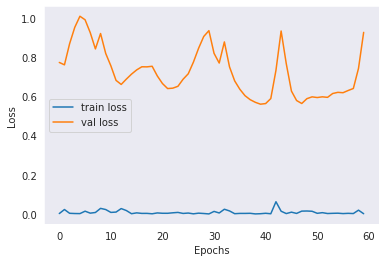

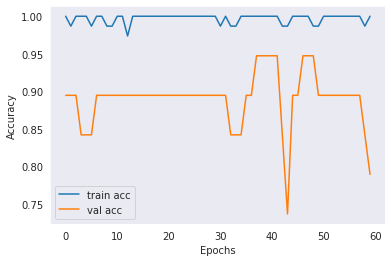

In [ ]:
#Plotting loss and accuracy with respect to epochs
plot_loss_and_acccuracy(hyper)

In [ ]:
# Creating a dataframe to have a look into the results
loss_and_accuracy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Hypertuned_models/my_logs.csv')
epoch_no =[1,2,11,12,13,22,36,37,38,39,40]#saved models epochno
loss_and_accuracy.loc[epoch_no] 

,epoch,accuracy,loss,val_accuracy,val_loss
1,1,0.986842,0.022961,0.894737,0.761312
2,2,1.000000,0.003644,0.894737,0.869137
11,11,1.000000,0.009877,0.894737,0.682011
12,12,0.973684,0.027775,0.894737,0.661285
13,13,1.000000,0.017714,0.894737,0.688537
22,22,1.000000,0.006228,0.894737,0.642264
36,36,1.000000,0.003083,0.894737,0.603889
37,37,1.000000,0.003629,0.947368,0.583529
38,38,1.000000,0.000588,0.947368,0.570087
39,39,1.000000,0.001576,0.947368,0.560497


Epoch40 seems to be the best generalized model with minimum loss

In [32]:
# load best model using the checkpoint
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Hypertuned_models/hypertuned_model_40.hdf5')

# Model evaluation
best_model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 396ms/step - loss: 2.8903 - accuracy: 0.7917


[2.8902781009674072, 0.7916666865348816]

In [33]:
y_pred_hyper = best_model.predict(X_test_scaled)
y_pred_hyper[:5]

1/1 [==============================] - 0s 367ms/step


array([[9.5799112e-11, 6.0242506e-08, 9.9999982e-01],
       [8.4484863e-01, 1.5317926e-01, 1.9720793e-03],
       [9.9999863e-01, 8.3864899e-07, 5.1706905e-07],
       [3.9112257e-07, 2.4498866e-06, 9.9999708e-01],
       [9.8186916e-01, 1.5851226e-02, 2.2796006e-03]], dtype=float32)

In [34]:
y_classes_hyper = [np.argmax(element) for element in y_pred_hyper]
y_classes_hyper[:24]

[2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2]

In [ ]:
# Classification report
print(classification_report(y_test,y_classes_hyper))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.38      0.55         8
           2       0.80      1.00      0.89         8

    accuracy                           0.79        24
   macro avg       0.84      0.79      0.76        24
weighted avg       0.84      0.79      0.76        24



Hypertuned model gives us the better result than previous model with accuracy 0.79 and the loss is 2.89

##### Data Augmentation using Image generator

In [ ]:
# Generating augmented images using ImageDataGenerator in Keras
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    vertical_flip=True
)

# creating list of index for labels present in Training dataset
label_0 = list(itertools.chain(*np.where(y_train == 0)))
label_1 = list(itertools.chain(*np.where(y_train == 1)))
label_2 = list(itertools.chain(*np.where(y_train == 2)))

# creating paths for each label to store files in each label
path_label_0 = '/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/label_0'
path_label_1 = '/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/label_1'
path_label_2 = '/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/label_2'

# Creating function to augment the data using Imagegenerator, 20 augmented images will be saved to the respective directory
def image_generator(label,path):
  for i in label:
    augment = 0
    for batch in datagen.flow(X_train[i].reshape((1,) + X_train[i].shape), batch_size=1,save_to_dir=path, save_prefix='augmented', save_format='JPG'):
      augment += 1
      if augment >= 20:
        break 
  print("Augmented Images generated in {} folder".format(path))

image_generator(label_0,path_label_0)
image_generator(label_1,path_label_1)
image_generator(label_2,path_label_2)

Augmented Images generated in /content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/label_0 folder
Augmented Images generated in /content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/label_1 folder
Augmented Images generated in /content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Data/label_2 folder


In [ ]:
len(list(data_dir.glob('*label_0/*')))

593

In [ ]:
len(list(data_dir.glob('*label_1/*')))

621

In [ ]:
len(list(data_dir.glob('*label_2/*')))

629

In [ ]:
path_0 = list(data_dir.glob('label_0/*'))
path_1 = list(data_dir.glob('label_1/*'))
path_2 = list(data_dir.glob('label_2/*'))

# Creating function to create the data using the augmented images by specifying the path
def create_data_from_image(path):
  data = []
  for image in path:
    img = cv2.imread(str(image))
    data.append(img)
  return data

# Data creation
label_0_data = create_data_from_image(path_0)
label_1_data = create_data_from_image(path_1)
label_2_data = create_data_from_image(path_2)

# Combining data and converting into Augmented data numpy array
augmented_data = np.array(label_0_data+label_1_data+label_2_data)

#Combining the labels for the augmented data and converting it into Augmented labels numpy array
augmented_labels = np.array(([0] * len(label_0_data)) + ([1] * len(label_1_data)) + ([2] * len(label_2_data)))

# Combing augmented data with the training data, so this can be used for training data
X_train_augmented = np.concatenate([X_train,augmented_data])
y_train_augmented = np.concatenate([y_train,augmented_labels])

#scaling the data to use this for training 
X_train_augmented = X_train_augmented / 255

In [ ]:
X_train_augmented.shape

(1938, 250, 250, 3)

In [ ]:
y_train_augmented.shape

(1938,)

##### Hypertuning using Keras tuner using data with Image Data generator

In [ ]:
# Hypertuning using build model function created earlier
tuner_search1=RandomSearch(build_model,objective='val_accuracy',max_trials=10,directory='output',project_name="RiceLeaf disease detection")
tuner_search1.search(X_train_augmented, y_train_augmented,epochs=10,validation_split=0.2)

Trial 10 Complete [01h 06m 29s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.4793814420700073
Total elapsed time: 10h 20m 23s


In [ ]:
# Selecting the top performed model 
datagen_hypertuned_model=tuner_search1.get_best_models(num_models=1)[0]
# View the structure of the model
datagen_hypertuned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 112)     3136      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 112)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 112)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        179264    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                    

In [ ]:
#File name includes epoch
filepath='/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/datagen_Hypertuned_models/datagen_hypertuned_model_{epoch:02d}.hdf5'

#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

#This callback will stop the training when there is no improvement in the validation loss for three consecutive epochs.
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/datagen_Hypertuned_models/my_logs.csv', separator=',', append=False)

# Used callbacks to save the best models with respect to validation loss
datagen_hyper = datagen_hypertuned_model.fit(X_train_scaled,y_train, epochs=100, validation_split =0.2, batch_size = 20, callbacks = [checkpoint,early_stop, log_csv])

Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.6974
Epoch 1: val_loss improved from inf to 0.79833, saving model to /content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/datagen_Hypertuned_models/datagen_hypertuned_model_01.hdf5
4/4 [==============================] - 18s 4s/step - loss: 0.6697 - accuracy: 0.6974 - val_loss: 0.7983 - val_accuracy: 0.6316
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 0.6026 - accuracy: 0.7632
Epoch 2: val_loss improved from 0.79833 to 0.71514, saving model to /content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/datagen_Hypertuned_models/datagen_hypertuned_model_02.hdf5
4/4 [==============================] - 12s 3s/step - loss: 0.6026 - accuracy: 0.7632 - val_loss: 0.7151 - val_accuracy: 0.7895
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: 0.6635 - accuracy: 0.7237
Epoch 3: val_loss did not improve f

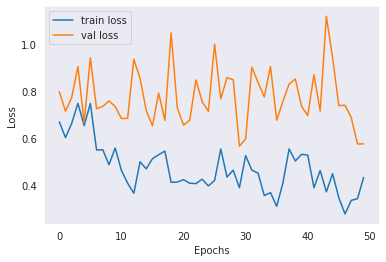

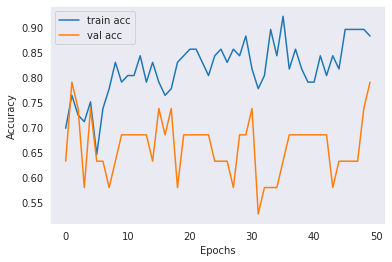

In [ ]:
#Plotting loss and accuracy with respect to epochs
plot_loss_and_acccuracy(datagen_hyper)

In [ ]:
# Creating a dataframe to view the results
loss_and_accuracy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/datagen_Hypertuned_models/my_logs.csv')
epoch_no =[1,2,5,16,30]#saved models epochno
loss_and_accuracy.loc[epoch_no] 

,epoch,accuracy,loss,val_accuracy,val_loss
1,1,0.763158,0.602623,0.789474,0.715140
2,2,0.723684,0.663499,0.736842,0.773505
5,5,0.644737,0.748222,0.631579,0.943266
16,16,0.763158,0.529673,0.684211,0.792640
30,30,0.815789,0.526073,0.736842,0.597402


In [ ]:
# load best model using the checkpoint
from tensorflow.keras.models import load_model
img_generated_hypertuned = load_model('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/datagen_Hypertuned_models/datagen_hypertuned_model_30.hdf5')
img_generated_hypertuned.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 1s 557ms/step - loss: 1.7267 - accuracy: 0.4583


[1.7267004251480103, 0.4583333432674408]

In [ ]:
# load best generalized model using the checkpoint
from tensorflow.keras.models import load_model
img_generated_hypertuned = load_model('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/datagen_Hypertuned_models/datagen_hypertuned_model_05.hdf5')
img_generated_hypertuned.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 160ms/step - loss: 0.9352 - accuracy: 0.5417


[0.9352478981018066, 0.5416666865348816]

Model created using Image generator is not performing good for this dataset

### Conclusion 

#### CNN model with data augmentation(add layers using Keras.Sequential) performed better than other models. 
Note: Hyperparameter tuning done using KerasTuner

Train Accuracy : 1.000000

Train loss : 0.003757

val_accuracy : 0.947368

val_loss : 0.563688

Test accuracy : 0.791666

Test loss : 2.890278

In [26]:
# load better performing model
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/PTID-CDS-SEP-22-1370A_Internship/PRCP-1001-RiceLeaf/Hypertuned_models/hypertuned_model_40.hdf5')

# Model evaluation
best_model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 1s 825ms/step - loss: 2.8903 - accuracy: 0.7917


[2.8902781009674072, 0.7916666865348816]

In [27]:
# view the structure of the model
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 246, 246, 48)      3648      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 48)        20784     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 48)       0         
 2D)                                                    

##### Visualizing the prediction of the model

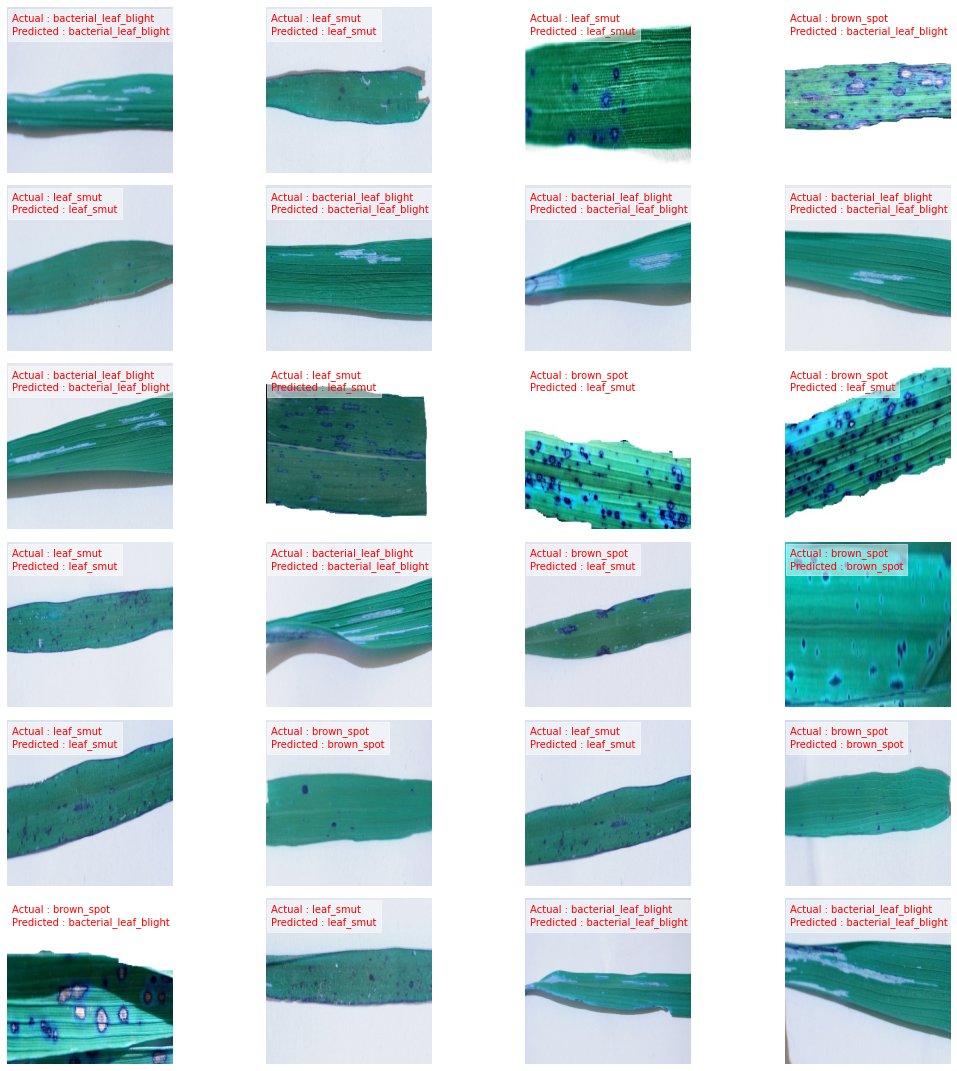

In [50]:
plt.figure(figsize=(15,15))
plotnumber = 1
for i in range(0, len(X_test)):
        ax = plt.subplot(6,4,plotnumber)
        plt.axis('off')
        plt.imshow(X_test[i])
        plt.text(7,40, "Actual : " + list(rice_leaf_labels_dict.keys())[list(rice_leaf_labels_dict.values()).index(y_test[i])] + "\n"
        + "Predicted : " + list(rice_leaf_labels_dict.keys())[list(rice_leaf_labels_dict.values()).index(y_classes_hyper[i])],
        color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.5))
        plotnumber += 1
plt.tight_layout()
plt.show() 